In [88]:
import numpy as np

def opt_problem(t):
    return t
    

from scipy.optimize import differential_evolution
import numpy as np
def ackley(x):
    return 1+np.log((1+0.5*x)*(1-0.0075*x*x)*(1+0.005*x*x))
bounds = [(0, 1000)]
result = differential_evolution(ackley, bounds)
result.x, result.fun


C:\Users\User\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\Anaconda3\envs\py36\lib\site-packages\scipy\optimize\_differentialevolution.py:1012: RuntimeWarning: invalid value encountered in less_equal
  return energy_trial <= energy_orig
C:\Users\User\Anaconda3\envs\py36\lib\site-packages\scipy\optimize\_differentialevolution.py:826: RuntimeWarning: invalid value encountered in less
  if (result.fun < DE_result.fun and


(array([467.94328244]), nan)

In [89]:
import matplotlib.pyplot as plt


C:\Users\User\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


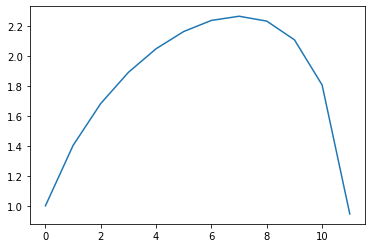

In [90]:
x_  = np.linspace(0, 1000, 1000)
plt.plot(ackley(x_))

In [ ]:
alpha = lambda a_hat, I_p_hat: np.exp(a_hat)*I_p_hat*0.5 if 0<a_hat<=1 else 0 if a_hat>1
gamma = lambda a_hat, I_d_hat: np.exp(I_d_hat)*a_hat*0.05 if 0<a_hat<=1 else 0 if a_hat>1
betta = lambda a_hat, I_d_hat, I_t_hat: (a_hat+gamma(a_hat,I_d_hat)*I_t_hat*1e-5) if 0<a_hat<=1 else 0 if a_hat>1
I_p = lambda t, a_hat, I_p_hat: I_p_hat*(1+alpha(a_hat,I_p_hat)*t) if I_p_hat*(1+alpha(a_hat,I_p_hat)*t)<1 else 1
I_d = lambda t, a_hat, I_d_hat: I_d_hat*(1+gamma(a_hat,I_d_hat)*t) if I_d_hat*(1+gamma(a_hat,I_d_hat)*t)<1 else 1
I_t = lambda t, a_hat, I_d_hat, I_t_hat: I_t_hat*(1-betta(a_hat,I_d_hat)*t)

In [125]:
lspace = np.linspace(0,100000,100000000)

In [126]:
def inequlity(f,t,bound1,bound2):
    return (f(t)<=bound2)*(f(t)>=bound1)

In [127]:
def parasha(t):
    return 1-np.log(t*t+t+3)

In [135]:
a = lspace*inequlity(parasha,lspace,0.1,0.5)

In [137]:
a[a==0]

array([0., 0., 0., ..., 0., 0., 0.])

In [138]:
parasha(lspace)

array([ -0.09861229,  -0.0989459 ,  -0.09928007, ..., -22.02586089,
       -22.02586091, -22.02586093])